In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fake = pd.read_csv("/content/drive/MyDrive/Capstonr/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/Capstonr/True.csv")

In [4]:
fake['target'] = 'fake'
true['target'] = 'true'

Joining the both datsets for better analysis





In [5]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

Shuffeling the Datasets

In [6]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
data.shape

(44898, 5)

In [7]:
#removing the most common word for better modelling
word_to_remove = "reuters"

# Remove the specified word from the 'text' column
data['text'] = data['text'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() != word_to_remove.lower()))


Converting the data to lowe case for the TEXT column

In [8]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,title,text,subject,date,target
0,U.S.-led forces acknowledge killing 50 more ci...,washington (reuters) - the u.s. led coalition ...,worldnews,"September 29, 2017",true
1,Trump's push to cut federal jobs has modest im...,washington (reuters) - president donald trump’...,politicsNews,"December 12, 2017",true
2,"Polish cut in retirement age comes into force,...",warsaw (reuters) - poland lowers its retiremen...,worldnews,"October 1, 2017",true
3,George H.W. Bush May Have Just Dealt An Incre...,guess who george h.w. bush is voting for? he l...,News,"September 20, 2016",fake
4,Strike called in Bangladesh over power price r...,dhaka (reuters) - several small opposition par...,worldnews,"November 24, 2017",true


Verticle plot of Fake News and True News

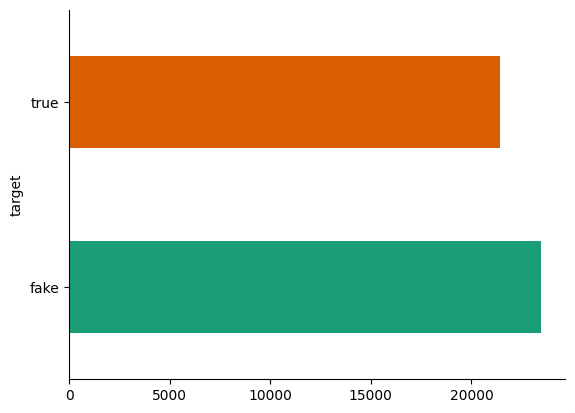

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Analyzing the genre of news based on SUBJECT column

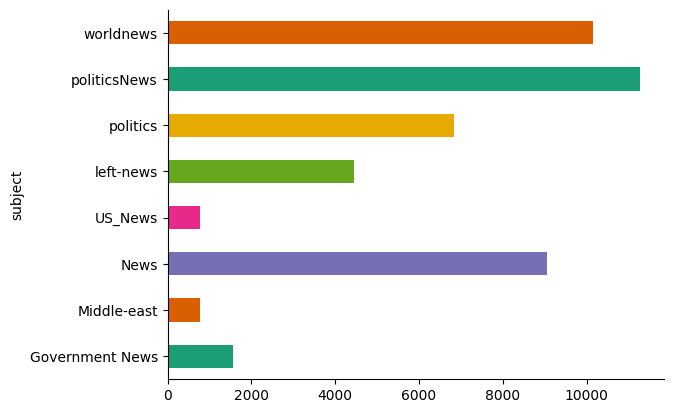

In [14]:

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Histogram

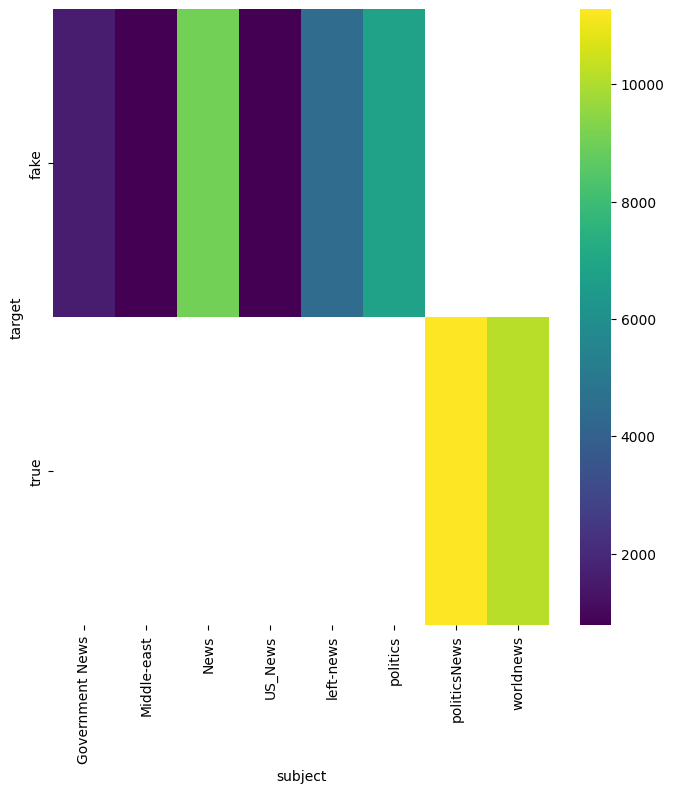

In [15]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['target'].value_counts()
    for x_label, grp in data.groupby('subject')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('subject')
_ = plt.ylabel('target')

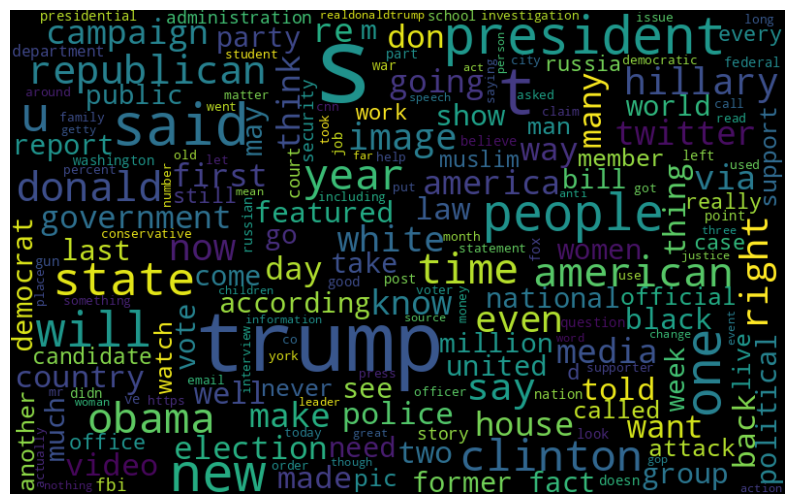

In [16]:
#Word Cloud of FAKE NEWS for better understanding
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

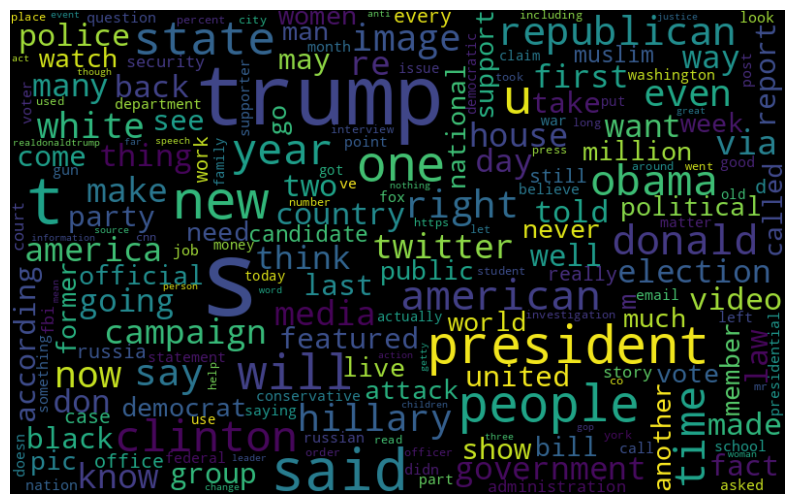

In [22]:
# Word Cloud for FAKE NEWS for better understanding
real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

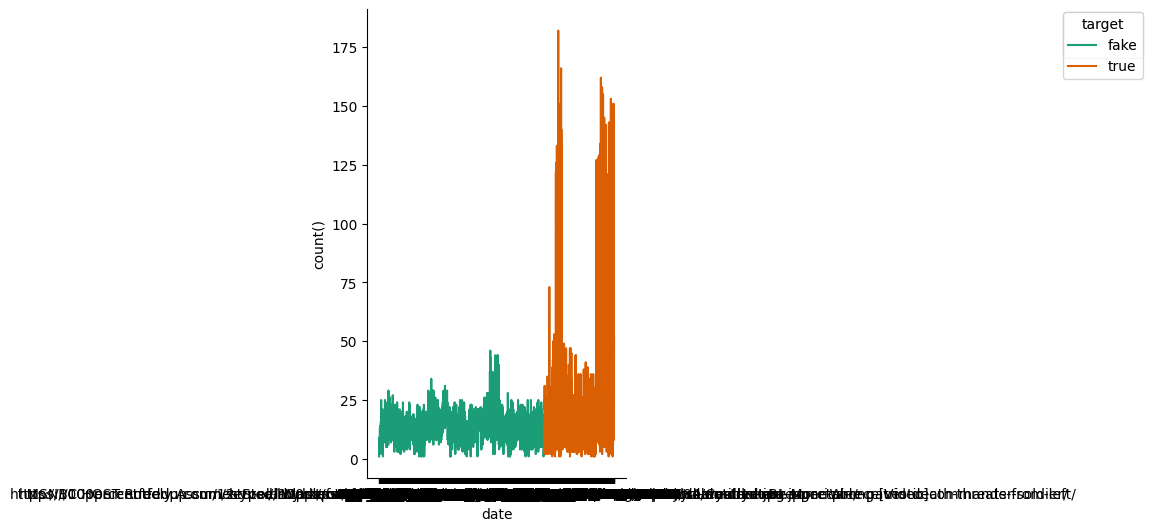

In [23]:
def _plot_series(series, series_name, series_index=0):

  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('target')):
  _plot_series(series, series_name, i)
  fig.legend(title='target', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')